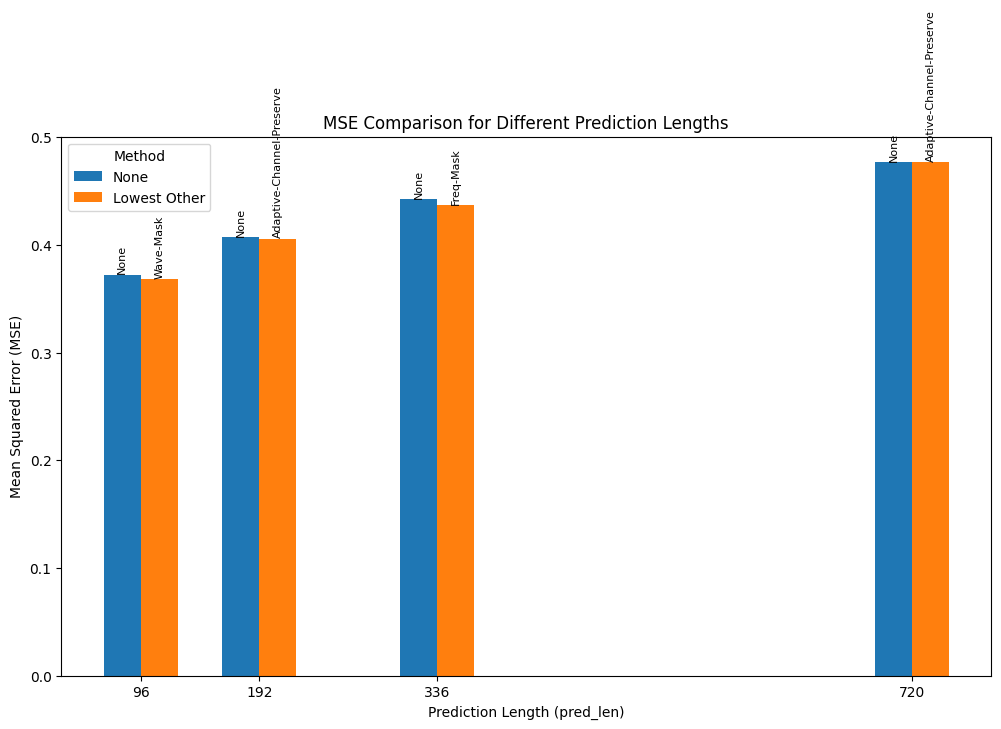

In [39]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Define the file path. Make sure this path is correct on your system.
file_path = "/home/abidhasan/Documnet/Project/a_c_p/result/results_ETTh1.txt"

# Read the data from the file
try:
    with open(file_path, "r") as file:
        data = file.read()
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    exit()

# Split the data into lines and parse each line
lines = data.strip().split("\n")
parsed_data = []

# Regex to extract pred_len, augmentation method, and MSE
pattern = re.compile(r"pred_len=(\d+), (.+?): .*? MSE=(\d+\.\d+).*")

for line in lines:
    match = pattern.search(line)
    if match:
        pred_len = int(match.group(1))
        augmentation = match.group(2)
        mse = float(match.group(3))
        parsed_data.append(
            {"pred_len": pred_len, "augmentation": augmentation, "MSE": mse}
        )

df = pd.DataFrame(parsed_data)

# Process the data for plotting
plot_data = []
for pred_len in df["pred_len"].unique():
    subset = df[df["pred_len"] == pred_len]
    none_row = subset[subset["augmentation"] == "None"]
    none_mse = none_row["MSE"].iloc[0]

    other_augmentations = subset[subset["augmentation"] != "None"]
    lowest_other_row = other_augmentations.loc[other_augmentations["MSE"].idxmin()]
    lowest_other_mse = lowest_other_row["MSE"]
    lowest_other_name = lowest_other_row["augmentation"]

    plot_data.append(
        {
            "pred_len": pred_len,
            "None": none_mse,
            "Lowest Other": lowest_other_mse,
            "Lowest Other Name": lowest_other_name,
        }
    )

plot_df = pd.DataFrame(plot_data)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 7))

x = plot_df["pred_len"]
width = 30

bar1 = ax.bar(x - width / 2, plot_df["None"], width, label="None")
bar2 = ax.bar(x + width / 2, plot_df["Lowest Other"], width, label="Lowest Other")

# Adding annotations for both bars
for p, name in zip(bar1, ["None"] * len(bar1)):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 0.001,
        name,
        ha="center",
        va="bottom",
        rotation=90,
        fontsize=8,
    )

for p, name in zip(bar2, plot_df["Lowest Other Name"]):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 0.001,
        name,
        ha="center",
        va="bottom",
        rotation=90,
        fontsize=8,
    )

ax.set_title("MSE Comparison for Different Prediction Lengths")
ax.set_xlabel("Prediction Length (pred_len)")
ax.set_ylabel("Mean Squared Error (MSE)")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Method")

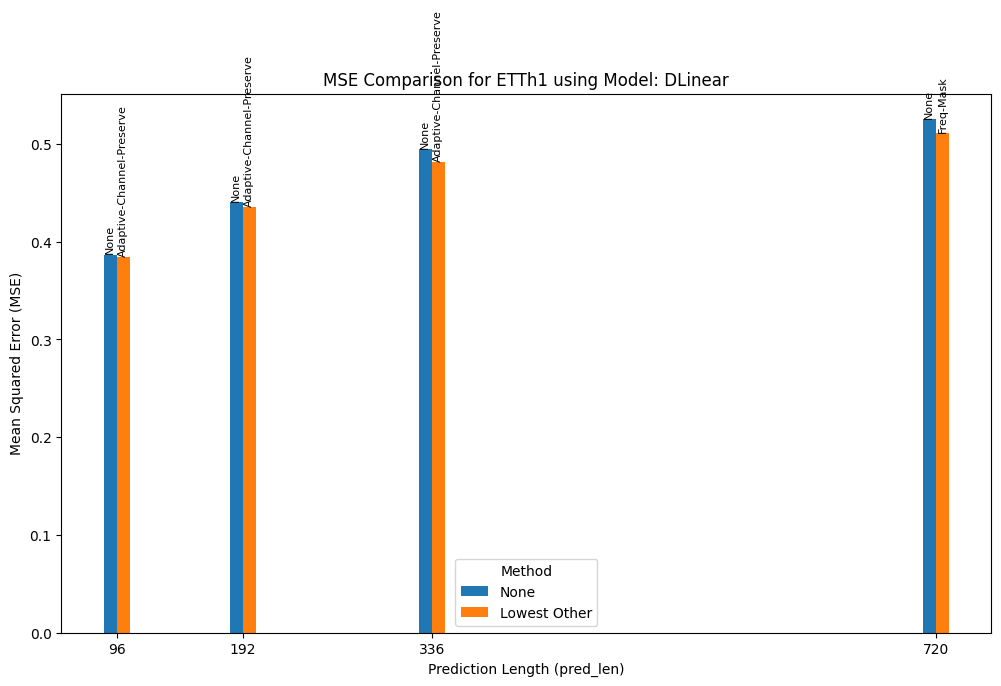

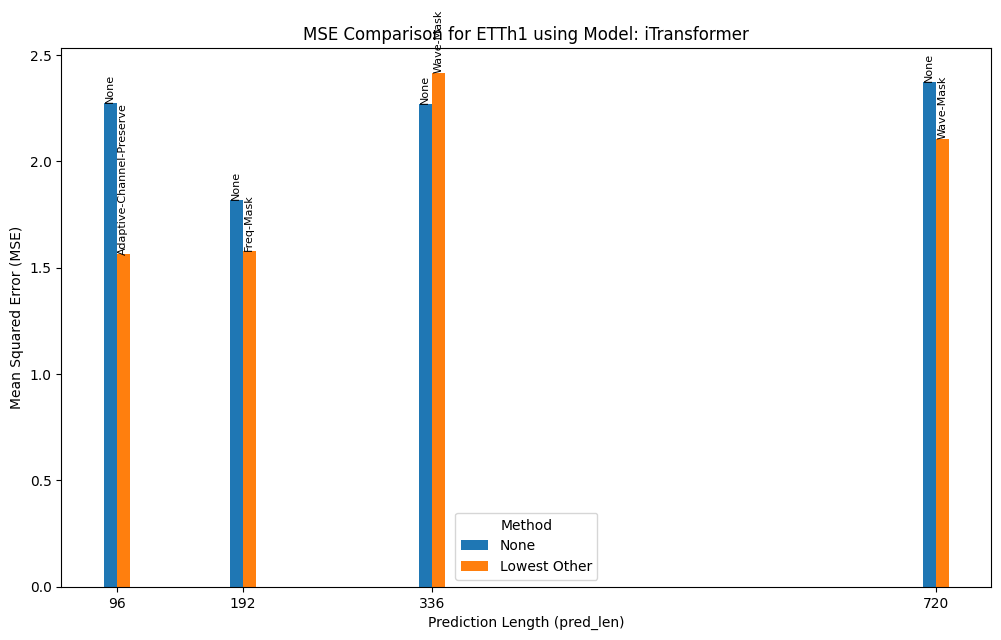

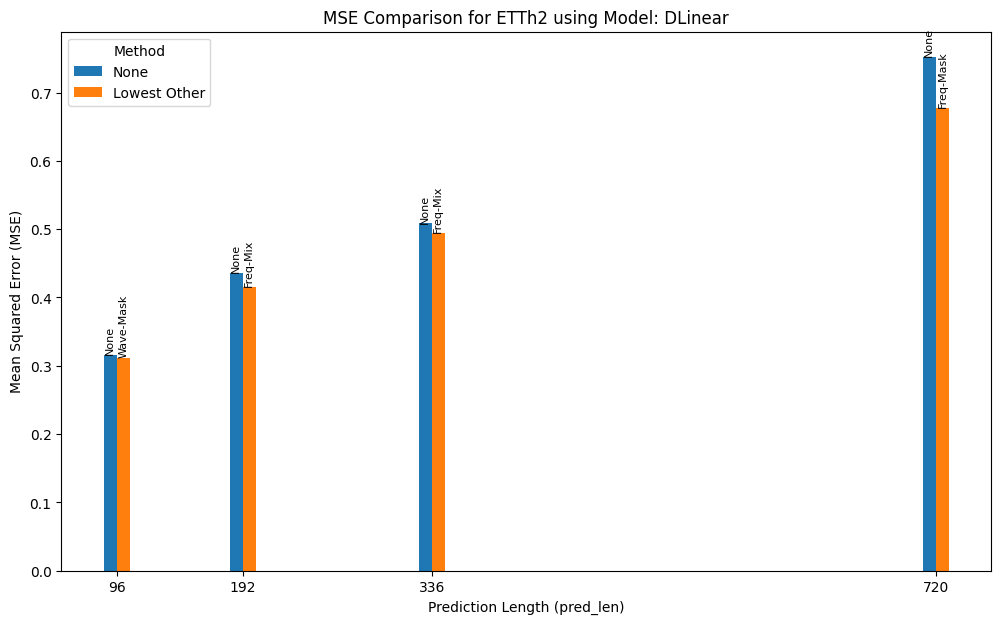

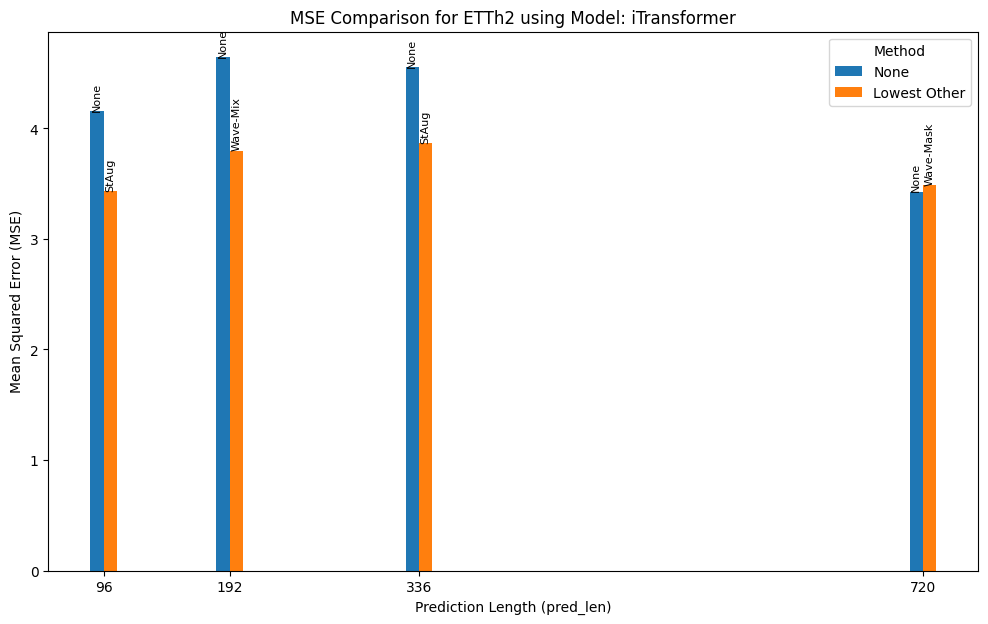

In [38]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Define the file path. Make sure this path is correct on your system.
file_path = "/home/abidhasan/Documnet/Project/a_c_p/results/experiment_results.txt"

# Read the data from the file
try:
    with open(file_path, "r") as file:
        data = file.read()
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    exit()

# Split the data into lines and parse each line
lines = data.strip().split("\n")
parsed_data = []

# Regex to extract dataset, model, pred_len, augmentation method, and MSE
pattern = re.compile(r"(.+?), (.+?), pred_len=(\d+), (.+?): .*? MSE=(\d+\.\d+).*")

for line in lines:
    match = pattern.search(line)
    if match:
        dataset = match.group(1)
        model = match.group(2)
        pred_len = int(match.group(3))
        augmentation = match.group(4)
        mse = float(match.group(5))
        parsed_data.append(
            {
                "dataset": dataset,
                "model": model,
                "pred_len": pred_len,
                "augmentation": augmentation,
                "MSE": mse,
            }
        )

df = pd.DataFrame(parsed_data)

# Get the unique datasets and models
datasets = df["dataset"].unique()
models = df["model"].unique()

# Loop through each dataset and model to create a separate plot
for dataset_name in datasets:
    for model_name in models:
        model_df = df[(df["dataset"] == dataset_name) & (df["model"] == model_name)]

        if model_df.empty:
            continue

        # Process the data for plotting for the current dataset and model
        plot_data = []
        for pred_len in model_df["pred_len"].unique():
            subset = model_df[model_df["pred_len"] == pred_len]

            none_row = subset[subset["augmentation"] == "None"]
            none_mse = none_row["MSE"].iloc[0] if not none_row.empty else None

            other_augmentations = subset[subset["augmentation"] != "None"]
            if not other_augmentations.empty:
                lowest_other_row = other_augmentations.loc[
                    other_augmentations["MSE"].idxmin()
                ]
                lowest_other_mse = lowest_other_row["MSE"]
                lowest_other_name = lowest_other_row["augmentation"]
            else:
                lowest_other_mse = None
                lowest_other_name = "N/A"

            plot_data.append(
                {
                    "pred_len": pred_len,
                    "None": none_mse,
                    "Lowest Other": lowest_other_mse,
                    "Lowest Other Name": lowest_other_name,
                }
            )

        plot_df = pd.DataFrame(plot_data)

        # Plotting the data
        fig, ax = plt.subplots(figsize=(12, 7))

        x = plot_df["pred_len"]
        width = 10

        bar1 = ax.bar(x - width / 2, plot_df["None"], width, label="None")
        bar2 = ax.bar(
            x + width / 2, plot_df["Lowest Other"], width, label="Lowest Other"
        )

        # Adding annotations for both bars
        for p, name in zip(bar1, ["None"] * len(bar1)):
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + 0.001,
                name,
                ha="center",
                va="bottom",
                rotation=90,
                fontsize=8,
            )

        for p, name in zip(bar2, plot_df["Lowest Other Name"]):
            if pd.notna(p.get_height()):
                height = p.get_height()
                ax.text(
                    p.get_x() + p.get_width() / 2.0,
                    height + 0.001,
                    name,
                    ha="center",
                    va="bottom",
                    rotation=90,
                    fontsize=8,
                )

        ax.set_title(f"MSE Comparison for {dataset_name} using Model: {model_name}")
        ax.set_xlabel("Prediction Length (pred_len)")
        ax.set_ylabel("Mean Squared Error (MSE)")
        ax.set_xticks(x)
        ax.set_xticklabels(x)
        ax.legend(title="Method")